In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.cluster import KMeans
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn import tree, metrics
import plotly.graph_objects as go

### Câu 1

In [ ]:
from google.colab import files
uploaded = files.upload()

In [ ]:
STUDENT = 'Hồ Thành Đạt - 6351071017'
df = pd.read_csv('https://raw.githubusercontent.com/thanhdatho0/6351071017_Lab3/main/Dataset/Mall_Customers.csv')

In [ ]:
print(STUDENT)
df.info()

Hồ Thành Đạt - 6351071017
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [ ]:
print(STUDENT)
df.head().T

Hồ Thành Đạt - 6351071017


,0,1,2,3,4
CustomerID,1,2,3,4,5
Gender,Male,Male,Female,Female,Female
Age,19,21,20,23,31
Annual Income (k$),15,15,16,16,17
Spending Score (1-100),39,81,6,77,40


In [ ]:
print(STUDENT)
df.describe()

Hồ Thành Đạt - 6351071017


,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [ ]:
print(STUDENT)
df.isnull().sum()

Hồ Thành Đạt - 6351071017


,0
CustomerID,0
Gender,0
Age,0
Annual Income (k$),0
Spending Score (1-100),0


In [19]:
print(STUDENT)
df.duplicated().sum()


Hồ Thành Đạt - 6351071017


np.int64(0)

### Câu 2

Hồ Thành Đạt - 6351071017


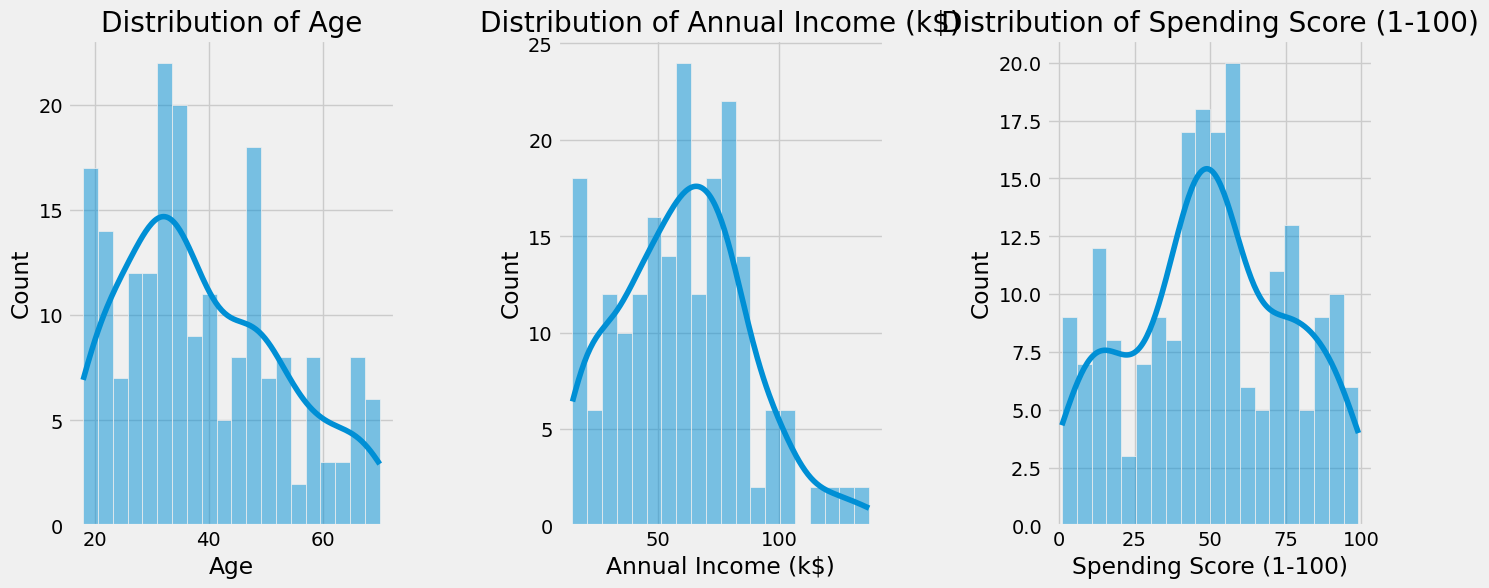

In [ ]:
plt.style.use('fivethirtyeight')
plt.figure(1, figsize=(15, 6))
n = 0
for x in ['Age', 'Annual Income (k$)', 'Spending Score (1-100)']:
    n += 1
    plt.subplot(1, 3, n)
    plt.subplots_adjust(hspace =0.5, wspace = 0.5)
    sns.histplot(df[x], bins=20, kde=True)
    plt.title('Distribution of {}'.format(x))
print(STUDENT)
plt.show()

### Câu 3

Hồ Thành Đạt - 6351071017


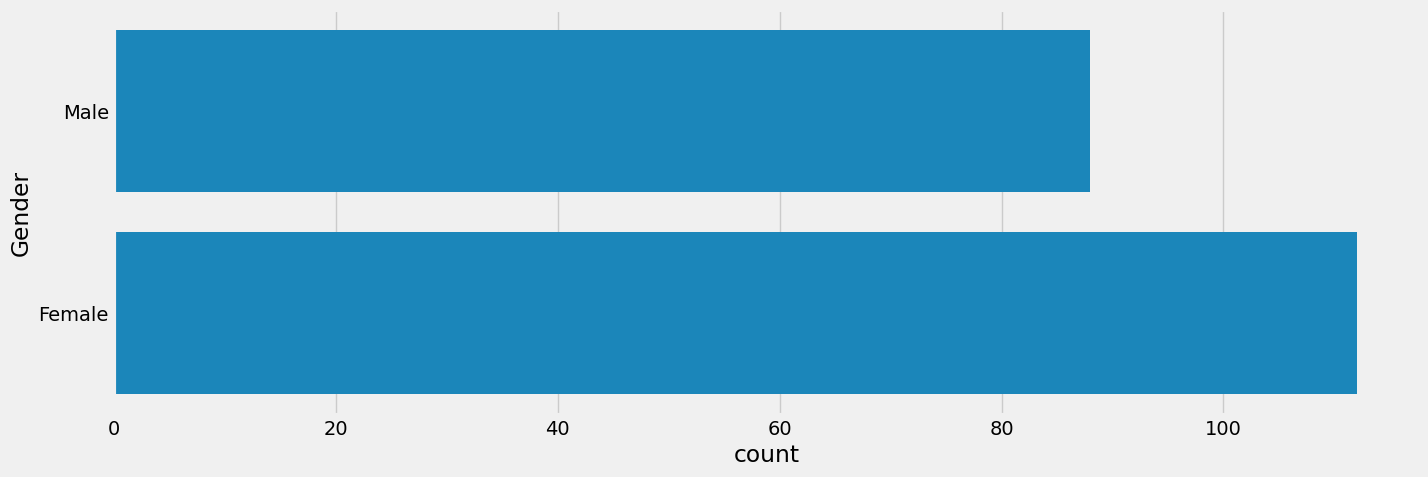

In [ ]:
plt.figure(1, figsize=(15,5))
sns.countplot(y='Gender', data=df)
print(STUDENT)
plt.show()

### Câu 4

Hồ Thành Đạt - 6351071017


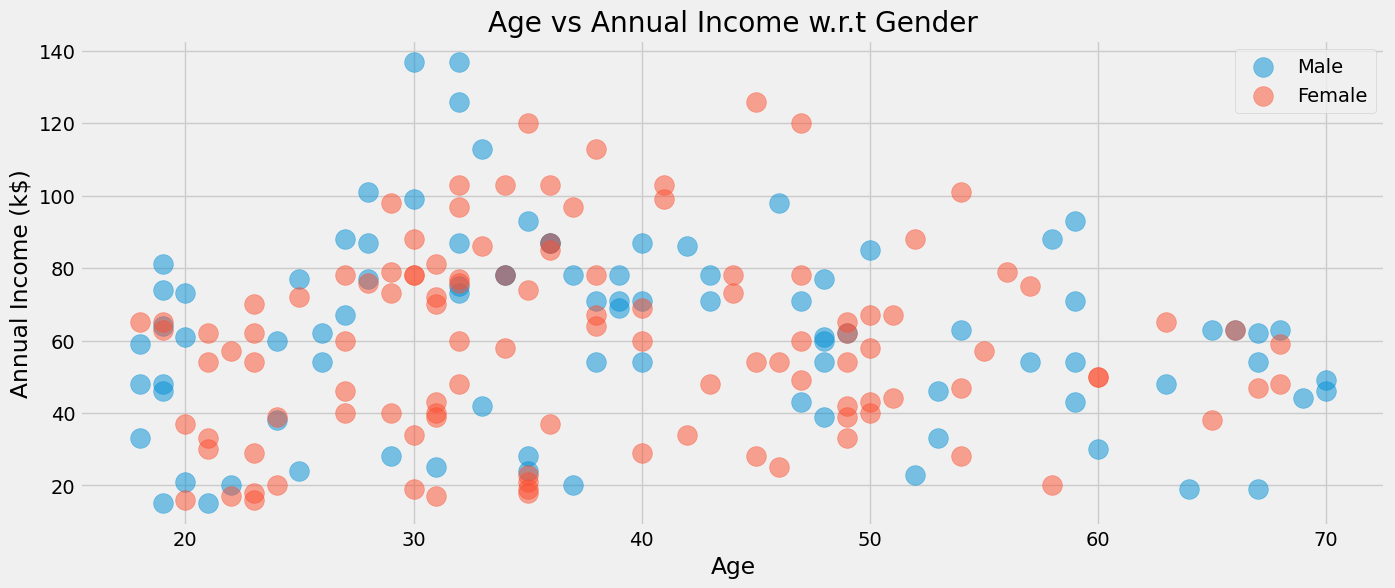

In [ ]:
plt.figure(1, figsize=(15, 6))
for gender in ['Male', 'Female']:
    plt.scatter(x='Age', y='Annual Income (k$)', data=df[df['Gender'] == gender],
                s = 200, alpha = 0.5, label = gender)
plt.xlabel('Age')
plt.ylabel('Annual Income (k$)')
plt.title('Age vs Annual Income w.r.t Gender')
plt.legend()
print(STUDENT)
plt.show()

### Câu 5

Hồ Thành Đạt - 6351071017


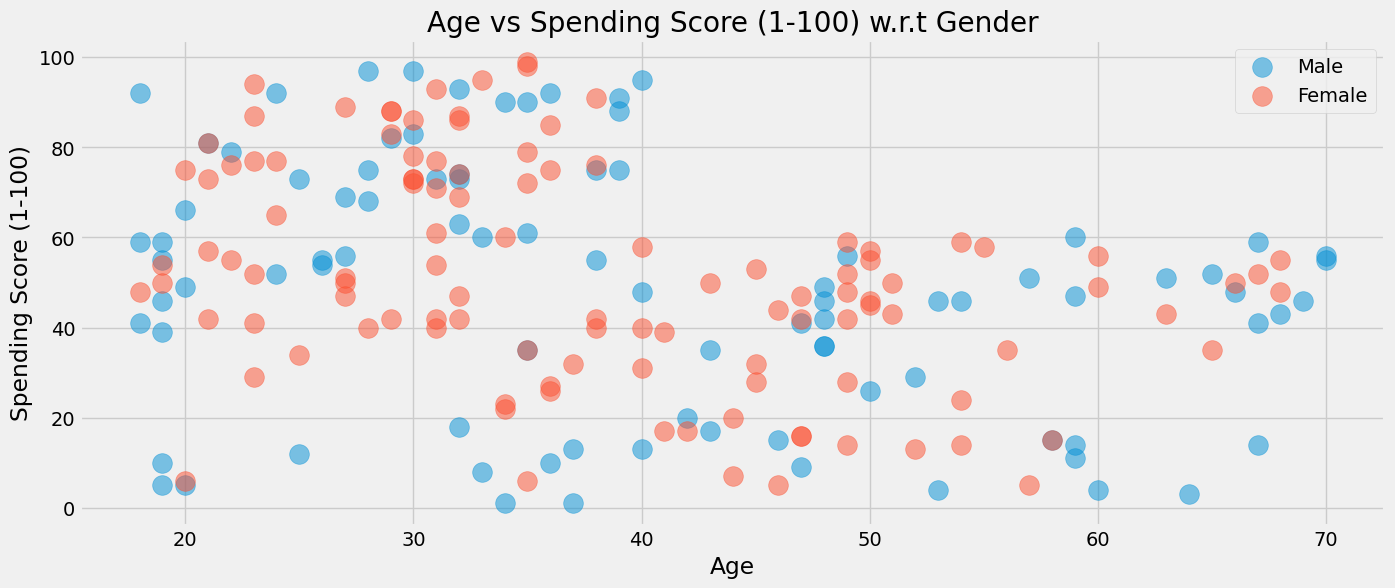

In [ ]:
plt.figure(1, figsize=(15, 6))
for gender in ['Male', 'Female']:
    plt.scatter(x='Age', y='Spending Score (1-100)', data=df[df['Gender'] == gender],
                s = 200, alpha = 0.5, label = gender)
plt.xlabel('Age')
plt.ylabel('Spending Score (1-100)')
plt.title('Age vs Spending Score (1-100) w.r.t Gender')
plt.legend()
print(STUDENT)
plt.show()

### Câu 6

In [ ]:
X1 = df[['Age', 'Spending Score (1-100)']].iloc[:, :].values
inertia = []
for n in range(1, 11):
  algorithms = KMeans(n_clusters = n, init = 'random')
  algorithms.fit(X1)
  inertia.append(algorithms.inertia_)

Hồ Thành Đạt - 6351071017


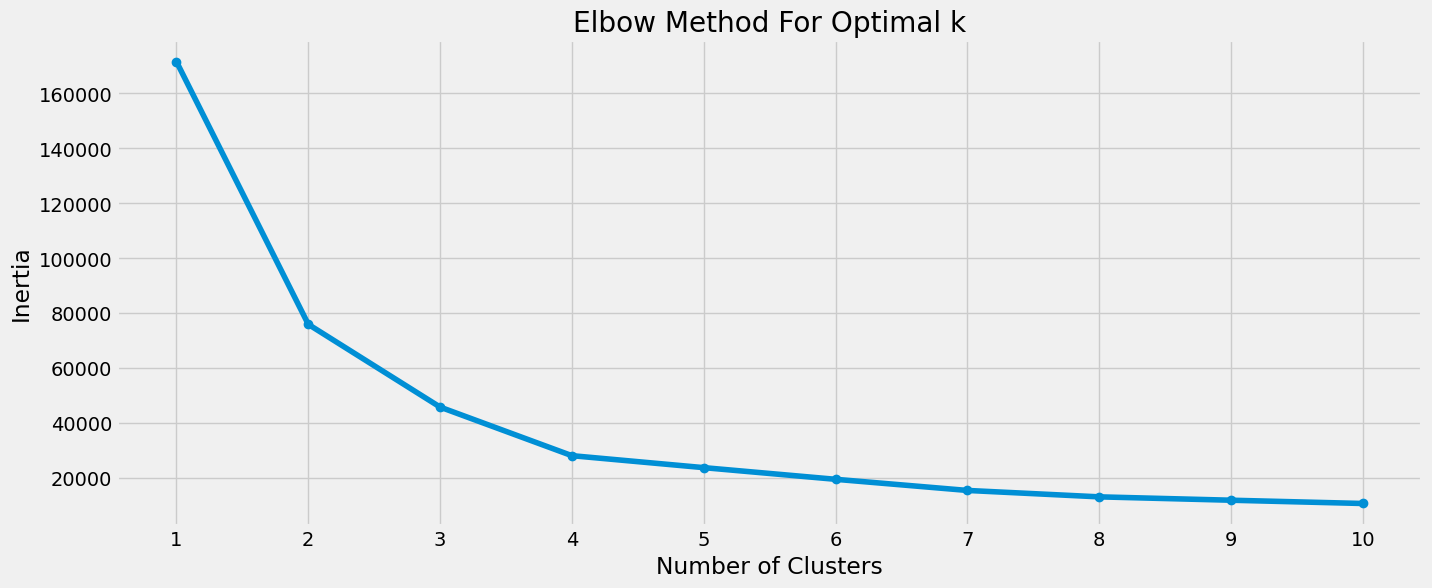

In [ ]:
plt.figure(figsize=(15,6))
plt.plot(np.arange(1, 11), inertia, marker='o', linestyle='-')  # marker + line
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.title('Elbow Method For Optimal k')
plt.xticks(np.arange(1, 11))
print(STUDENT)
plt.show()

In [ ]:
algorithm = KMeans(n_clusters = 4, init='random')
algorithm.fit(X1)
labels1 = algorithm.labels_
centroids = algorithm.cluster_centers_

### Câu 7

Hồ Thành Đạt - 6351071017


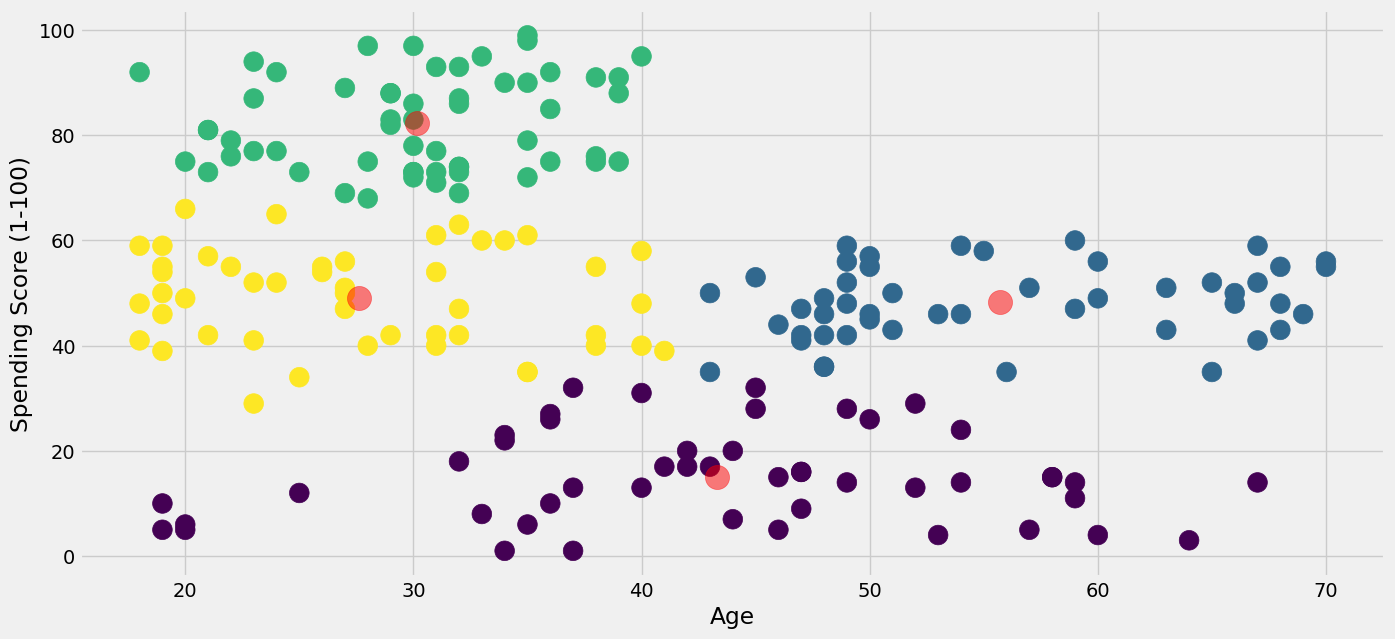

In [ ]:
plt.figure(1, figsize=(15, 7))
plt.clf()
plt.scatter(x = 'Age', y = 'Spending Score (1-100)', data = df, c = labels1, s = 200)
plt.scatter(x = centroids[:, 0], y = centroids[:, 1], s = 300, c = 'red', alpha = 0.5)
plt.ylabel('Spending Score (1-100)')
plt.xlabel('Age')
print(STUDENT)
plt.show()

### Câu 8

In [ ]:
print(STUDENT)
metrics.silhouette_score(X1, labels1, metric = 'euclidean')

Hồ Thành Đạt - 6351071017


np.float64(0.49973941540141753)

### Câu 9

In [ ]:
import plotly.graph_objects as go

df['label3'] = labels1

trace1 = go.Scatter3d(
    x=df['Age'],
    y=df['Spending Score (1-100)'],
    z=df['Annual Income (k$)'],
    mode='markers',
    marker=dict(
        size=15,
        color=df['label3'],       # màu theo cluster
        colorscale='Viridis',
        line=dict(color='black', width=2),  # viền đen cố định
        opacity=0.8
    )
)

fig = go.Figure(data=[trace1])
fig.update_layout(
    title='3D Cluster Plot',
    width=1200,
    height=800,
    scene=dict(
        xaxis_title='Age',
        yaxis_title='Spending Score',
        zaxis_title='Annual Income'
    )
)
print(STUDENT)
fig.show()

Hồ Thành Đạt - 6351071017
